# Statistiques sur les trains TGV de la SNCF

In [274]:
%matplotlib inline

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [276]:
df = pd.read_csv('data/regularite-mensuelle-tgv-aqst.csv', delimiter=";")
df.head()

,Date,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Commentaire annulations,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,...,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"
0,2018-01,National,ANGERS SAINT LAUD,PARIS MONTPARNASSE,91,393,2,NaN,204,6.400490,...,35,6.072847,19,4,37.500000,37.500000,8.928571,5.357143,8.928571,1.785714
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,...,22,5.696096,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,143,775,7,NaN,148,9.377815,...,45,2.546962,21,4,21.666667,25.000000,11.666667,40.000000,1.666667,0.000000
3,2018-01,National,PARIS MONTPARNASSE,LAVAL,84,217,0,NaN,32,11.609375,...,16,5.822811,5,2,24.242424,54.545455,3.030303,12.121212,3.030303,3.030303
4,2018-01,National,PARIS MONTPARNASSE,NANTES,124,508,3,NaN,71,7.235211,...,39,5.292211,18,8,33.333333,22.222222,16.666667,20.370370,5.555556,1.851852


In [277]:
df.shape

(6324, 26)

In [278]:
df.isna().sum()

Date                                                                                              0
Service                                                                                           0
Gare de départ                                                                                    0
Gare d'arrivée                                                                                    0
Durée moyenne du trajet                                                                           0
Nombre de circulations prévues                                                                    0
Nombre de trains annulés                                                                          0
Commentaire annulations                                                                        6324
Nombre de trains en retard au départ                                                              0
Retard moyen des trains en retard au départ                                                       0


Suppression des colonnes possédant des données manquantes

In [279]:
df.dropna(axis = 1, inplace = True)
df.shape

(6324, 23)

In [280]:
df.drop_duplicates(inplace=True)
df.shape

(6324, 23)

In [281]:
df.describe()

,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,Retard moyen de tous les trains au départ,Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée,Retard moyen de tous les trains à l'arrivée,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,168.364485,244.284472,11.543801,89.404491,10.386532,2.975748,31.871917,33.008380,5.288479,22.453985,28.313645,10.459519,3.711259,24.385401,22.869181,18.234726,18.245399,6.257706,6.481338
std,86.273859,165.248615,27.182925,91.760544,13.383193,5.835297,27.726689,15.554139,8.712921,19.353596,19.850033,9.876564,4.246828,17.445229,16.477759,14.958479,14.275646,8.157455,10.547854
min,0.000000,0.000000,0.000000,0.000000,0.000000,-229.269444,0.000000,-40.109259,-472.638889,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,133.750000,0.000000,21.000000,4.418838,1.028414,12.000000,23.611046,2.926658,9.000000,7.739368,4.000000,1.000000,12.500000,12.121212,7.692308,8.571429,0.000000,0.000000
50%,162.000000,210.000000,3.000000,57.000000,7.965843,2.148165,25.000000,31.438492,4.681114,18.000000,31.223264,8.000000,2.000000,22.222222,20.930233,16.642764,16.666667,4.545455,2.518366
75%,219.000000,315.000000,10.000000,131.000000,12.877041,3.752811,44.000000,40.429394,7.219683,31.000000,40.984239,15.000000,5.000000,33.333333,31.034483,26.315789,25.000000,9.090909,8.333333
max,786.000000,973.000000,288.000000,591.000000,316.188095,84.516667,239.000000,255.866667,92.000000,192.000000,255.866667,91.000000,39.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## Coordonnées

Afin de pouvoir visualiser nos données sur une carte, et comparer certaines grandeurs en fonction des régions, on télécharge un deuxième dataset contenant les coordonnées des gares

In [304]:
coord = pd.read_csv('data/referentiel-gares-voyageurs.csv', delimiter=";").drop(['Date fin validité plateforme', 'SOPs'], axis=1).dropna()
coord.head()

,Code plate-forme,Code gare,Code UIC,Intitulé plateforme,Code postal,Code Commune,Commune,Code département,Département,Longitude,...,Intitulé fronton de gare,Gare DRG,Gare étrangère,DTG,Région SNCF,Unité gare,UT,Nbre plateformes,TVS,WGS 84
1,00004-1,4,87785006,Cerbère,66290.0,48.0,Cerbère,66.0,Pyrénées-Orientales,3.163403,...,Cerbère,True,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,CERBERE GARE,1,CER,"42.4417732,3.1634033"
2,00006-1,6,87784884,Ur - Les Escaldes,66760.0,218.0,Ur,66.0,Pyrénées-Orientales,1.940482,...,Ur les Escaldes,True,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,UR LES ESCALDES GARE,1,URL,"42.457481,1.9404821"
3,00022-1,22,87784728,Olette - Canaveilles,66360.0,125.0,Olette,66.0,Pyrénées-Orientales,2.271931,...,Olette - Canaveilles les Bains,True,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,OLETTE CANAVEILLES LES BAINS GARE,1,OLE,"42.55472,2.2719309"
4,00027-1,27,87784637,Prades - Molitg-les-Bains,66500.0,149.0,Prades,66.0,Pyrénées-Orientales,2.429418,...,Prades - Molitg-les-Bains,True,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,PRADES MOLITG LES BAINS GARE,1,PDS,"42.6170988,2.4294184"
5,00047-1,47,87783563,Barjac,48000.0,18.0,Barjac,48.0,Lozère,3.410979,...,Barjac,True,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,BARJAC GARE,1,BJC,"44.4992638,3.4109786"


In [306]:
coord['Région SNCF'] = coord['Région SNCF'].map(lambda s: s.replace("REGION ", ""))
coord['Région SNCF'] = coord['Région SNCF'].map(lambda s: "ILE DE FRANCE" if "PARIS" in s else s)
coord['Région SNCF'].head()

1    LANGUEDOC-ROUSSILLON
2    LANGUEDOC-ROUSSILLON
3    LANGUEDOC-ROUSSILLON
4    LANGUEDOC-ROUSSILLON
5    LANGUEDOC-ROUSSILLON
Name: Région SNCF, dtype: object

Afin de pouvoir joindre nos deux dataframe, il faut qu'on fasse correspondre nos gares d'arrivée et de départ aux colonnes "Intitulé fronton de gare" et "UT". Pour cela, il faut que l'on transforme un peu ces colonnes :

In [307]:
coord['UT'] = coord['UT'].astype(str)
coord['UT'] = coord['UT'].map(lambda s: s.replace(" GARE", ""))

coord['Intitulé fronton de gare'] = coord['Intitulé fronton de gare'].astype(str).map(lambda s: s.upper())


In [308]:
gares = pd.DataFrame(df['Gare de départ'].unique(), columns=['Gare'])
gares.shape

(59, 1)

In [309]:
gares_1 = pd.merge(gares, coord[['UT', 'Région SNCF', 'WGS 84']], left_on='Gare', right_on='UT', how='left').drop('UT', axis=1).dropna().drop_duplicates()
gares_1.shape

(31, 3)

In [310]:
gares_2 = pd.merge(gares, coord[['Intitulé fronton de gare', 'Région SNCF', 'WGS 84']], left_on='Gare', right_on='Intitulé fronton de gare', how='left').drop('Intitulé fronton de gare', axis=1).dropna().drop_duplicates()
gares_2.shape

(25, 3)

In [311]:
gares = pd.concat([gares_1, gares_2]).drop_duplicates()
gares.shape

(38, 3)

In [394]:
df_coord = pd.merge(df, gares, left_on='Gare de départ', right_on='Gare', how='left', suffixes=(None, "_départ")).drop('Gare', axis=1).dropna().drop_duplicates()
df_coord.rename({'WGS 84': 'Coord_départ', 'Région SNCF': 'Région_départ'}, axis=1, inplace=True)
df_coord.shape

(6354, 25)

In [395]:
df_coord = pd.merge(df_coord, gares, left_on='Gare d\'arrivée', right_on='Gare', how='left').drop('Gare', axis=1).dropna().drop_duplicates()
df_coord.rename({'WGS 84': 'Coord_arrivée', 'Région SNCF': 'Région_arrivée'}, axis=1, inplace=True)
df_coord.shape

(5262, 27)

In [396]:
df_coord

,Date,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,Retard moyen de tous les trains au départ,...,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)",Région_départ,Coord_départ,Région_arrivée,Coord_arrivée
0,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,8,2.875000,0.095796,...,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000,POITOU-CHARENTES AQUITAINE,"46.15269,-1.145305",ILE DE FRANCE,"48.841172,2.320514"
1,2018-01,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,143,775,7,148,9.377815,1.582530,...,21.666667,25.000000,11.666667,40.000000,1.666667,0.000000,ILE DE FRANCE,"48.841172,2.320514",POITOU-CHARENTES AQUITAINE,"44.825873,-0.556697"
2,2018-01,National,PARIS MONTPARNASSE,LAVAL,84,217,0,32,11.609375,1.455760,...,24.242424,54.545455,3.030303,12.121212,3.030303,3.030303,ILE DE FRANCE,"48.841172,2.320514",PAYS DE LA LOIRE,"48.076206,-0.760907"
3,2018-01,National,PARIS MONTPARNASSE,NANTES,124,508,3,71,7.235211,0.734290,...,33.333333,22.222222,16.666667,20.370370,5.555556,1.851852,ILE DE FRANCE,"48.841172,2.320514",PAYS DE LA LOIRE,"47.216148,-1.542356"
5,2018-01,National,PARIS MONTPARNASSE,TOULOUSE MATABIAU,257,182,1,38,10.412281,1.958748,...,47.619048,28.571429,0.000000,19.047619,4.761905,0.000000,ILE DE FRANCE,"48.841172,2.320514",MIDI PYRENEES,"43.611206,1.453616"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7063,2022-03,National,POITIERS,PARIS MONTPARNASSE,99,476,8,162,6.578498,2.081156,...,17.187500,37.500000,12.500000,14.062500,7.812500,10.937500,POITOU-CHARENTES AQUITAINE,"46.582275,0.333241",ILE DE FRANCE,"48.841172,2.320514"
7064,2022-03,National,RENNES,LYON PART DIEU,234,75,0,20,7.215000,1.938444,...,20.000000,0.000000,40.000000,0.000000,0.000000,40.000000,BRETAGNE,"48.103517,-1.672744",RHONE-ALPES,"45.760559,4.859355"
7065,2022-03,National,SAINT ETIENNE CHATEAUCREUX,PARIS LYON,168,115,0,23,2.039130,0.845072,...,12.500000,12.500000,12.500000,50.000000,0.000000,12.500000,RHONE-ALPES,"45.443366,4.399722",ILE DE FRANCE,"48.844888,2.37352"
7066,2022-03,National,SAINT ETIENNE CHATEAUCREUX,PARIS LYON,168,115,0,23,2.039130,0.845072,...,12.500000,12.500000,12.500000,50.000000,0.000000,12.500000,RHONE-ALPES,"45.443366,4.399722",ILE DE FRANCE,"48.83917,2.38278"


Comme on ne possède pas d'information sur les gares à l'international, on peut supprimer la colonne "Service"

In [397]:
del df_coord['Service']
df_coord.head()

,Date,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,Retard moyen de tous les trains au départ,Nombre de trains en retard à l'arrivée,...,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)",Région_départ,Coord_départ,Région_arrivée,Coord_arrivée
0,2018-01,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,8,2.875000,0.095796,34,...,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000,POITOU-CHARENTES AQUITAINE,"46.15269,-1.145305",ILE DE FRANCE,"48.841172,2.320514"
1,2018-01,PARIS MONTPARNASSE,BORDEAUX ST JEAN,143,775,7,148,9.377815,1.582530,79,...,21.666667,25.000000,11.666667,40.000000,1.666667,0.000000,ILE DE FRANCE,"48.841172,2.320514",POITOU-CHARENTES AQUITAINE,"44.825873,-0.556697"
2,2018-01,PARIS MONTPARNASSE,LAVAL,84,217,0,32,11.609375,1.455760,66,...,24.242424,54.545455,3.030303,12.121212,3.030303,3.030303,ILE DE FRANCE,"48.841172,2.320514",PAYS DE LA LOIRE,"48.076206,-0.760907"
3,2018-01,PARIS MONTPARNASSE,NANTES,124,508,3,71,7.235211,0.734290,58,...,33.333333,22.222222,16.666667,20.370370,5.555556,1.851852,ILE DE FRANCE,"48.841172,2.320514",PAYS DE LA LOIRE,"47.216148,-1.542356"
5,2018-01,PARIS MONTPARNASSE,TOULOUSE MATABIAU,257,182,1,38,10.412281,1.958748,21,...,47.619048,28.571429,0.000000,19.047619,4.761905,0.000000,ILE DE FRANCE,"48.841172,2.320514",MIDI PYRENEES,"43.611206,1.453616"


In [398]:
df_coord['Date'] = pd.to_datetime(df_coord['Date'])

In [399]:
df_coord.set_index('Date', inplace=True)

In [431]:
df_départ = df_coord.groupby([df_coord.index.to_period("Y"), "Région_départ"]).mean().reset_index().set_index('Date')
df_arrivée = df_coord.groupby([df_coord.index.to_period("Y"), "Région_arrivée"]).mean().reset_index().set_index('Date')

df_départ

,Région_départ,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,Retard moyen de tous les trains au départ,Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée,Retard moyen de tous les trains à l'arrivée,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"
Date,,,,,,,,,,,,,,,,,,,,
2018,ALPES,189.312500,218.270833,17.437500,64.750000,11.159670,3.698160,46.312500,34.403595,9.198986,41.416667,9.198986,17.854167,5.458333,29.595339,20.933436,25.182989,13.838038,5.020406,3.346458
2018,ALSACE,200.000000,267.458333,10.750000,110.875000,7.822147,2.719247,41.625000,34.551906,7.475405,29.708333,7.475405,12.625000,3.833333,31.566335,18.758931,21.411015,19.558505,2.692146,6.013068
2018,BOURGOGNE FRANCHE-COMTE,98.666667,432.583333,25.250000,227.916667,9.703141,5.243322,49.416667,34.005138,4.548527,34.916667,4.548527,17.666667,8.250000,25.583206,21.797426,25.808349,15.882461,7.536551,3.392008
2018,BRETAGNE,189.016667,293.483333,26.750000,73.383333,9.279648,1.836427,45.783333,31.510884,6.861168,29.816667,6.852851,10.866667,3.666667,29.232692,28.297778,13.041930,22.113964,3.463817,3.849818
2018,CENTRE,76.916667,180.833333,10.000000,16.333333,6.475614,0.622418,41.000000,15.580807,4.470426,12.000000,4.470426,4.833333,1.250000,23.334270,29.325366,20.934603,19.136756,3.424638,3.844367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,NORD PAS DE CALAIS,144.750000,212.750000,2.416667,59.750000,13.363548,2.020027,29.166667,24.957291,3.500293,14.333333,32.999689,5.750000,1.916667,15.032267,21.916983,27.147509,24.891736,5.593865,5.417640
2022,PAYS DE LA LOIRE,148.000000,332.166667,2.000000,80.916667,10.950907,2.034708,41.500000,28.492758,3.914852,23.166667,37.996400,10.083333,4.166667,19.234172,23.411051,18.039298,13.077345,6.407576,19.830558
2022,POITOU-CHARENTES AQUITAINE,186.333333,401.250000,9.500000,111.916667,9.010301,1.889924,49.000000,34.180635,4.762149,35.916667,39.898559,18.000000,6.833333,32.942250,23.057293,12.351591,13.329738,2.229763,16.089366


In [434]:
df_arrivée

,Région_arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,Retard moyen de tous les trains au départ,Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée,Retard moyen de tous les trains à l'arrivée,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"
Date,,,,,,,,,,,,,,,,,,,,
2018,ALPES,188.770833,208.312500,16.854167,34.083333,17.333974,2.835164,38.583333,35.690834,9.005968,31.750000,9.005968,16.104167,4.750000,27.463167,18.037902,21.465432,28.038410,4.200246,0.794843
2018,ALSACE,208.208333,265.625000,14.375000,48.333333,9.426961,2.041777,26.708333,35.055377,5.564788,21.083333,5.564788,10.125000,3.166667,30.981220,18.110984,14.484138,26.631573,5.417348,4.374738
2018,BOURGOGNE FRANCHE-COMTE,96.500000,439.416667,29.833333,64.750000,17.253796,2.435119,40.000000,34.813823,3.772674,31.583333,3.772674,16.500000,5.416667,18.907958,13.850951,10.870690,49.077199,5.557473,1.735729
2018,BRETAGNE,186.783333,287.700000,25.833333,46.700000,11.849260,2.739441,36.016667,35.956328,7.315030,25.500000,7.306007,12.016667,4.333333,23.818098,28.714660,13.774924,24.285339,4.186313,5.220666
2018,CENTRE,74.166667,174.750000,9.416667,21.166667,11.477326,0.955125,37.416667,16.418789,4.851938,10.500000,4.851938,4.500000,1.333333,25.506569,23.214029,22.494313,21.524185,5.016588,2.244317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,NORD PAS DE CALAIS,176.000000,165.333333,2.933333,15.066667,16.281067,1.561212,15.466667,37.890661,5.448067,9.266667,46.275333,5.400000,2.666667,32.543736,13.744025,12.108159,13.448624,8.894854,19.260602
2022,PAYS DE LA LOIRE,146.833333,329.083333,3.166667,26.500000,13.376725,0.645518,31.083333,32.425357,3.410234,15.500000,46.552747,8.083333,3.750000,26.118481,18.481458,13.859836,16.864911,3.184242,21.491072
2022,POITOU-CHARENTES AQUITAINE,180.583333,421.083333,11.083333,36.250000,13.017635,1.002706,27.000000,28.331290,2.895308,20.750000,32.667106,9.583333,1.916667,12.738872,26.820679,10.891191,27.061434,1.370989,21.116837


Région_départ
ALPES                         AxesSubplot(0.125,0.125;0.775x0.755)
ALSACE                        AxesSubplot(0.125,0.125;0.775x0.755)
BOURGOGNE FRANCHE-COMTE       AxesSubplot(0.125,0.125;0.775x0.755)
BRETAGNE                      AxesSubplot(0.125,0.125;0.775x0.755)
CENTRE                        AxesSubplot(0.125,0.125;0.775x0.755)
CHAMPAGNE-ARDENNE             AxesSubplot(0.125,0.125;0.775x0.755)
ILE DE FRANCE                 AxesSubplot(0.125,0.125;0.775x0.755)
LANGUEDOC-ROUSSILLON          AxesSubplot(0.125,0.125;0.775x0.755)
LORRAINE                      AxesSubplot(0.125,0.125;0.775x0.755)
MIDI PYRENEES                 AxesSubplot(0.125,0.125;0.775x0.755)
NORD PAS DE CALAIS            AxesSubplot(0.125,0.125;0.775x0.755)
PAYS DE LA LOIRE              AxesSubplot(0.125,0.125;0.775x0.755)
POITOU-CHARENTES AQUITAINE    AxesSubplot(0.125,0.125;0.775x0.755)
PROVENCE ALPES COTE D'AZUR    AxesSubplot(0.125,0.125;0.775x0.755)
RHONE-ALPES                   AxesSubplot(0.125,

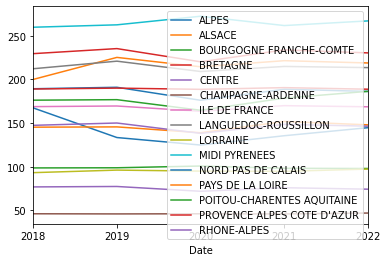

In [435]:
df_départ.groupby('Région_départ')['Durée moyenne du trajet'].plot(legend=True)

Région_départ
ALPES                         AxesSubplot(0.125,0.125;0.775x0.755)
ALSACE                        AxesSubplot(0.125,0.125;0.775x0.755)
BOURGOGNE FRANCHE-COMTE       AxesSubplot(0.125,0.125;0.775x0.755)
BRETAGNE                      AxesSubplot(0.125,0.125;0.775x0.755)
CENTRE                        AxesSubplot(0.125,0.125;0.775x0.755)
CHAMPAGNE-ARDENNE             AxesSubplot(0.125,0.125;0.775x0.755)
ILE DE FRANCE                 AxesSubplot(0.125,0.125;0.775x0.755)
LANGUEDOC-ROUSSILLON          AxesSubplot(0.125,0.125;0.775x0.755)
LORRAINE                      AxesSubplot(0.125,0.125;0.775x0.755)
MIDI PYRENEES                 AxesSubplot(0.125,0.125;0.775x0.755)
NORD PAS DE CALAIS            AxesSubplot(0.125,0.125;0.775x0.755)
PAYS DE LA LOIRE              AxesSubplot(0.125,0.125;0.775x0.755)
POITOU-CHARENTES AQUITAINE    AxesSubplot(0.125,0.125;0.775x0.755)
PROVENCE ALPES COTE D'AZUR    AxesSubplot(0.125,0.125;0.775x0.755)
RHONE-ALPES                   AxesSubplot(0.125,

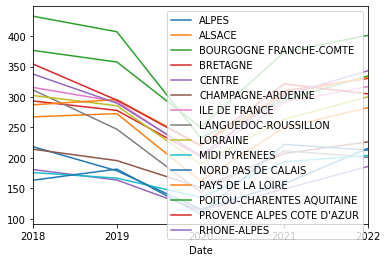

In [436]:
df_départ.groupby('Région_départ')['Nombre de circulations prévues'].plot(legend=True)

Région_départ
ALPES                         AxesSubplot(0.125,0.125;0.775x0.755)
ALSACE                        AxesSubplot(0.125,0.125;0.775x0.755)
BOURGOGNE FRANCHE-COMTE       AxesSubplot(0.125,0.125;0.775x0.755)
BRETAGNE                      AxesSubplot(0.125,0.125;0.775x0.755)
CENTRE                        AxesSubplot(0.125,0.125;0.775x0.755)
CHAMPAGNE-ARDENNE             AxesSubplot(0.125,0.125;0.775x0.755)
ILE DE FRANCE                 AxesSubplot(0.125,0.125;0.775x0.755)
LANGUEDOC-ROUSSILLON          AxesSubplot(0.125,0.125;0.775x0.755)
LORRAINE                      AxesSubplot(0.125,0.125;0.775x0.755)
MIDI PYRENEES                 AxesSubplot(0.125,0.125;0.775x0.755)
NORD PAS DE CALAIS            AxesSubplot(0.125,0.125;0.775x0.755)
PAYS DE LA LOIRE              AxesSubplot(0.125,0.125;0.775x0.755)
POITOU-CHARENTES AQUITAINE    AxesSubplot(0.125,0.125;0.775x0.755)
PROVENCE ALPES COTE D'AZUR    AxesSubplot(0.125,0.125;0.775x0.755)
RHONE-ALPES                   AxesSubplot(0.125,

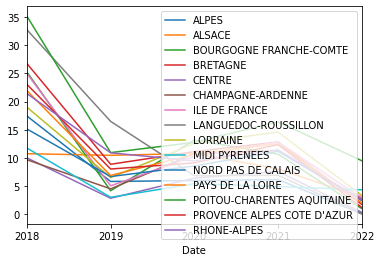

In [437]:
df_départ.groupby('Région_départ')['Nombre de trains annulés'].plot(legend=True)

Région_départ
ALPES                         AxesSubplot(0.125,0.125;0.775x0.755)
ALSACE                        AxesSubplot(0.125,0.125;0.775x0.755)
BOURGOGNE FRANCHE-COMTE       AxesSubplot(0.125,0.125;0.775x0.755)
BRETAGNE                      AxesSubplot(0.125,0.125;0.775x0.755)
CENTRE                        AxesSubplot(0.125,0.125;0.775x0.755)
CHAMPAGNE-ARDENNE             AxesSubplot(0.125,0.125;0.775x0.755)
ILE DE FRANCE                 AxesSubplot(0.125,0.125;0.775x0.755)
LANGUEDOC-ROUSSILLON          AxesSubplot(0.125,0.125;0.775x0.755)
LORRAINE                      AxesSubplot(0.125,0.125;0.775x0.755)
MIDI PYRENEES                 AxesSubplot(0.125,0.125;0.775x0.755)
NORD PAS DE CALAIS            AxesSubplot(0.125,0.125;0.775x0.755)
PAYS DE LA LOIRE              AxesSubplot(0.125,0.125;0.775x0.755)
POITOU-CHARENTES AQUITAINE    AxesSubplot(0.125,0.125;0.775x0.755)
PROVENCE ALPES COTE D'AZUR    AxesSubplot(0.125,0.125;0.775x0.755)
RHONE-ALPES                   AxesSubplot(0.125,

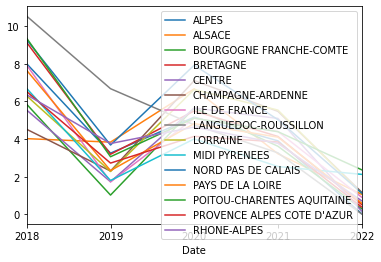

In [441]:
df_départ['Pourcentage de trains annulés'] = df_départ['Nombre de trains annulés'] / df_départ['Nombre de circulations prévues'] * 100
df_départ.groupby('Région_départ')['Pourcentage de trains annulés'].plot(legend=True)

Région_arrivée
ALPES                         AxesSubplot(0.125,0.125;0.775x0.755)
ALSACE                        AxesSubplot(0.125,0.125;0.775x0.755)
BOURGOGNE FRANCHE-COMTE       AxesSubplot(0.125,0.125;0.775x0.755)
BRETAGNE                      AxesSubplot(0.125,0.125;0.775x0.755)
CENTRE                        AxesSubplot(0.125,0.125;0.775x0.755)
CHAMPAGNE-ARDENNE             AxesSubplot(0.125,0.125;0.775x0.755)
ILE DE FRANCE                 AxesSubplot(0.125,0.125;0.775x0.755)
LANGUEDOC-ROUSSILLON          AxesSubplot(0.125,0.125;0.775x0.755)
LORRAINE                      AxesSubplot(0.125,0.125;0.775x0.755)
MIDI PYRENEES                 AxesSubplot(0.125,0.125;0.775x0.755)
NORD PAS DE CALAIS            AxesSubplot(0.125,0.125;0.775x0.755)
PAYS DE LA LOIRE              AxesSubplot(0.125,0.125;0.775x0.755)
POITOU-CHARENTES AQUITAINE    AxesSubplot(0.125,0.125;0.775x0.755)
PROVENCE ALPES COTE D'AZUR    AxesSubplot(0.125,0.125;0.775x0.755)
RHONE-ALPES                   AxesSubplot(0.125

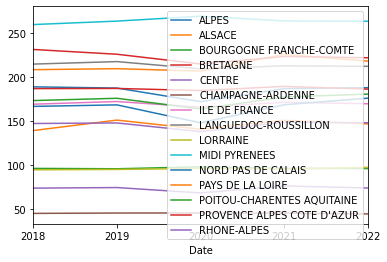

In [442]:
df_arrivée.groupby('Région_arrivée')['Durée moyenne du trajet'].plot(legend=True)
